In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [3]:
import pandas as pd
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
from utilities_functions.ri_calculator import find_smallest_variation_to_change
import deepmatcher as dm
import torch

In [4]:
attributes =['Beer_Name','Brew_Factory_Name','Style','ABV']

In [5]:
model = dm.MatchingModel(attr_summarizer='hybrid')
model.load_state('../../models/beer_hybrid.pth')
model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Beer_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [6]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('../../Structured/Beer/'
                                                                         ,'negatives',32,model,
                                                                        model.classifier)

In [7]:
testneg_classifier_inputs,testneg_classifier_outputs,testneg_ids = return_layer_input_output('../../Structured/Beer/'
                                                                         ,'test_negatives',32,model,
                                                                        model.classifier)

In [8]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('../../Structured/Beer',
                                                                       'positives',32,model,
                                                                       model.classifier)

In [9]:
testpos_classifier_inputs,testpos_classifier_outputs,testpos_ids = return_layer_input_output('../../Structured/Beer',
                                                                       'test_positives',32,model,
                                                                       model.classifier)

In [10]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))
test_negative_classifier_inputs = list(map(lambda x: x[0],testneg_classifier_inputs))
test_positive_classifier_inputs = list(map(lambda x: x[0],testpos_classifier_inputs))

In [11]:
attribute_length = int((300*3)/len(attributes))
classifier_length = int(attribute_length*len(attributes))

In [12]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(model.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

In [13]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [14]:
negatives_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)

In [15]:
negatives_variation_df.head(10)

,Beer_Name,Brew_Factory_Name,Style,ABV
0,5.282521,5.316662,5.967141,6.123256
1,5.530912,5.418684,6.051332,6.147931
2,5.576994,5.458108,6.092056,6.187691
3,1.585808,1.761034,2.614126,2.459374
4,5.437360,5.278323,6.020243,6.108400
5,5.030659,5.166296,5.961424,6.052751
6,4.221484,4.375889,5.801026,5.746493
7,0.000000,0.000000,0.000000,0.000000
8,1.755091,1.874130,2.746550,2.568866
9,4.254356,4.539613,5.837492,5.859885


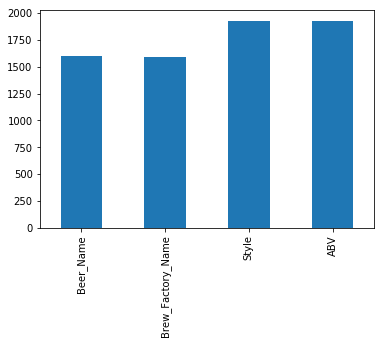

In [17]:
ri_sums = negatives_variation_df.sum(numeric_only=True)
ri_sums.plot.bar()

In [18]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in positive_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(model.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

In [19]:
ri_norms_positives = []
for ri_list in positives_ri_matrix:
    ri_norms_positives.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [20]:
positives_variation_df = pd.DataFrame(data= ri_norms_positives,columns=attributes)

In [21]:
positives_variation_df.head(10)

,Beer_Name,Brew_Factory_Name,Style,ABV
0,4.335642,4.924490,7.447158,7.172989
1,8.283175,8.798171,13.645796,12.298247
2,4.133457,4.694985,7.302072,6.973562
3,1.464354,1.638445,2.461158,2.352857
4,2.708905,3.059126,4.730907,4.518573
5,6.162747,6.877522,10.512429,10.024121
6,2.735990,3.087032,4.786888,4.553381
7,2.827513,3.179950,4.825217,4.613905
8,4.266125,4.836874,7.564023,7.134510
9,4.192001,4.604423,7.127645,6.769151


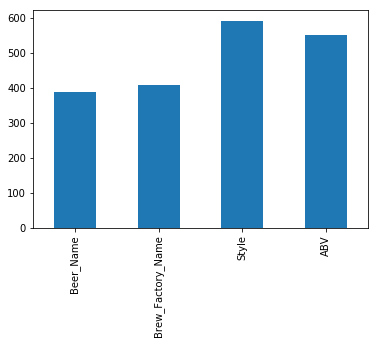

In [22]:
ri_sums = positives_variation_df.sum(numeric_only=True)
ri_sums.plot.bar()

## Compute closer vectors

In [23]:
from utilities_functions.distance_measures import nearest_neighbour,nearest_neighbour_onAttribute

In [24]:
#lista di tuple: vettore più vicino considerando tutti gli elementi e closer solo secondo un attributo
negatives_closer_vectors = []
i = 0
for batch in negative_classifier_inputs:
    for sample in batch:
        current_sample_closer_vectors = list(map(lambda att: nearest_neighbour_onAttribute
                                                 (sample+negatives_ri_matrix[i][attributes.index(att)]
                                                                ,positive_classifier_inputs,attributes.index(att),
                                                                attribute_length,'cosine'),attributes))
        negatives_closer_vectors.append(current_sample_closer_vectors)
        i += 1 

In [25]:
# per ogni attributo trovo il più vicino
positives_closer_vectors = []
i = 0
for batch in positive_classifier_inputs:
    for sample in batch:
        current_sample_closer_vectors = list(map(lambda att: nearest_neighbour_onAttribute
                                                 (sample+positives_ri_matrix[i][attributes.index(att)]
                                                                ,negative_classifier_inputs,attributes.index(att),
                                                                attribute_length,'cosine'),attributes))
        positives_closer_vectors.append(current_sample_closer_vectors)
        i += 1 

In [26]:
positives_closer_vectors_df = pd.DataFrame(data= positives_closer_vectors,columns =attributes)
positives_closer_vectors_df = positives_closer_vectors_df.applymap(lambda c:neg_ids[c])

In [27]:
negatives_closer_vectors_df = pd.DataFrame(data = negatives_closer_vectors, columns = attributes)
negatives_closer_vectors_df = negatives_closer_vectors_df.applymap(lambda c:pos_ids[c])

In [28]:
negatives = pd.read_csv('../../Structured/Beer/negatives.csv')
positives = pd.read_csv('../../Structured/Beer/positives.csv')

### Analyze nearest neighbours on beer name

In [35]:
from collections import OrderedDict
def find_most_frequent_tokens (column):
    word_map = {}
    for val in column:
        tokens = val.split()
        for token in tokens:
            if token in word_map:
                word_map[token]+=1
            else:
                word_map[token] = 1
    word_map = OrderedDict(sorted(word_map.items(),key = lambda t: t[1],reverse=True))
    return word_map

In [36]:
nearest_neighbours_beername = pd.merge(positives_closer_vectors_df, negatives, how='inner',left_on='Beer_Name',right_on='id')

In [37]:
tokens = find_most_frequent_tokens(nearest_neighbours_beername['ltable_Beer_Name'])

In [41]:
tokens ['Ale']

51

In [45]:
nearest_neighbours_beername['rtable_Beer_Name'].value_counts()

Flying Monkeys Amber Ale                                            11
De Koninck TSTBRW 01 Imperial Red Ale                                6
21st Amendment Bourbon Barrel Lower da Boom Barleywine               6
18th Street Deal With the Devil Pale Ale                             5
Colorado Mountain Ole 59er Amber Ale                                 4
AleSmith YuleSmith &#40; Winter &#41; Imperial Red Ale               3
Rock Bottom La Jolla Ragtop Red Ale                                  3
Three Heads Buffalo Soul Jah Imperial Red Ale                        3
Blue Pants Big & Tall # 2 : Barrel Aged Belgian Red                  2
ShuBrew Heart and Sole Imperial Red Ale                              2
Yukon You Only Live Once Imperial Red Ale                            2
The Civil Life Stevie_s 5 Star Amber Ale                             2
Hermit Thrush Abbey Series # 1 - Jolly Abbot Barley Wine             2
Kettle House Bourbon Barrel Road Rash Imperial Red Ale               2
Hill F

In [ ]:
positives = pd.read_csv('../Structured/Beer/positives.csv')
nearest_neighbours_beername_neg = pd.merge(negatives_closer_vectors_df, positives, how='inner',left_on='Beer_Name',right_on='id')

In [42]:
train = pd.read_csv('../../Structured/Beer/merged_train.csv')
train_pos = train[train['label']==1]
train_neg = train[train['label']==0]

In [41]:
train_pos['ltable_Beer_Name'].value_counts()

Dream Of The 90 's                               1
Barbarian Red Ale                                1
Heavyweight Ticklefight Champion Of The World    1
Rip Saw Red                                      1
Ballistic Brewing Co. - Gorgon Red Ale           1
Shirt Tail Amber                                 1
Poor Richard 's Ale                              1
My Hoppy Valentine                               1
Old Cellar Dweller                               1
Barrel Aged Chessie                              1
Unite Red Rye Ale                                1
Boohai Red Ale                                   1
Kuhnhenn Extraneous Ale                          1
Peak Organic The Maple Collaboration             1
Oatmeal Amber Ale                                1
Ise Kadoya Amber Ale                             1
Fullers Traitors ' Gate                          1
Regimental 80 Scottish Ale                       1
Dark Horse Amber Ale                             1
Neudorf Red Ale                

In [44]:
train_pos['rtable_Beer_Name'].value_counts()

21st Amendment Poor Richards Ale                             1
Barbarian Red Ale                                            1
Vital Infrared Imperial Red                                  1
Dark Horse Amber Ale                                         1
Sacramento River Otter Ale                                   1
Mountain Town Cow Catcher Red Ale                            1
Cape Ann Fisherman_s Tea Party                               1
Crazy Mountain Boohai Red Ale &#40; Kura Koa &#41;           1
Fuller_s Traitor_s Gate                                      1
Point Ybel Sanibel Red Island Ale                            1
Kuhnhenn Extraneous Ale                                      1
Peak Organic The Maple Collaboration                         1
Rockyard Blarney Rock Irish Ale                              1
Crooked Eye Regimental 80 Scottish Ale                       1
White Lion Insane Mane Red Ale                               1
Kalamazoo Royal Amber Ale                              